In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks
from keras.models import Sequential 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy import stats



In [2]:
# Load dataset
# The Auto MPG dataset is loaded from the CSV file
# This dataset contains information about cars including MPG, horsepower, weight, etc.
df = pd.read_csv(r'C:\Users\ayesh\auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [4]:
# 1. Handling Missing Values
# Converting horsepower column to numeric and filling missing values with median
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # Convert horsepower to numeric

missing_columns = ['horsepower']
for col in missing_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [5]:
# 2. Feature Scaling
# Scaling numerical features to range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ['displacement', 'horsepower', 'weight', 'acceleration']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# 3. Encoding Categorical Variables
# Encoding 'car name' column using Label Encoding\encoder = LabelEncoder()
encoder = LabelEncoder()
df['car name'] = encoder.fit_transform(df['car name'])

In [7]:
# 5. Outlier Detection & Removal using Z-score (Optional if you want to remove outliers)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df = df[~outliers]

In [8]:
# 6. Target Variable Transformation
# Log transformation on mpg to improve normality
df['mpg'] = np.log(df['mpg'])

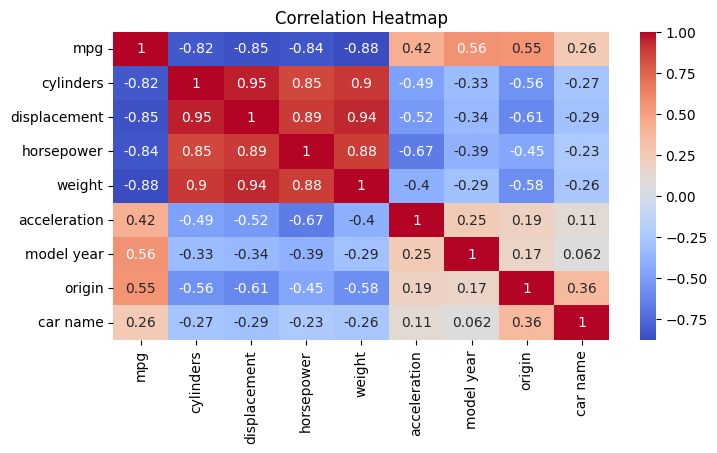

In [9]:
#Exploratory Data Analysis
# heatmap to show correlation between features
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 800x400 with 0 Axes>

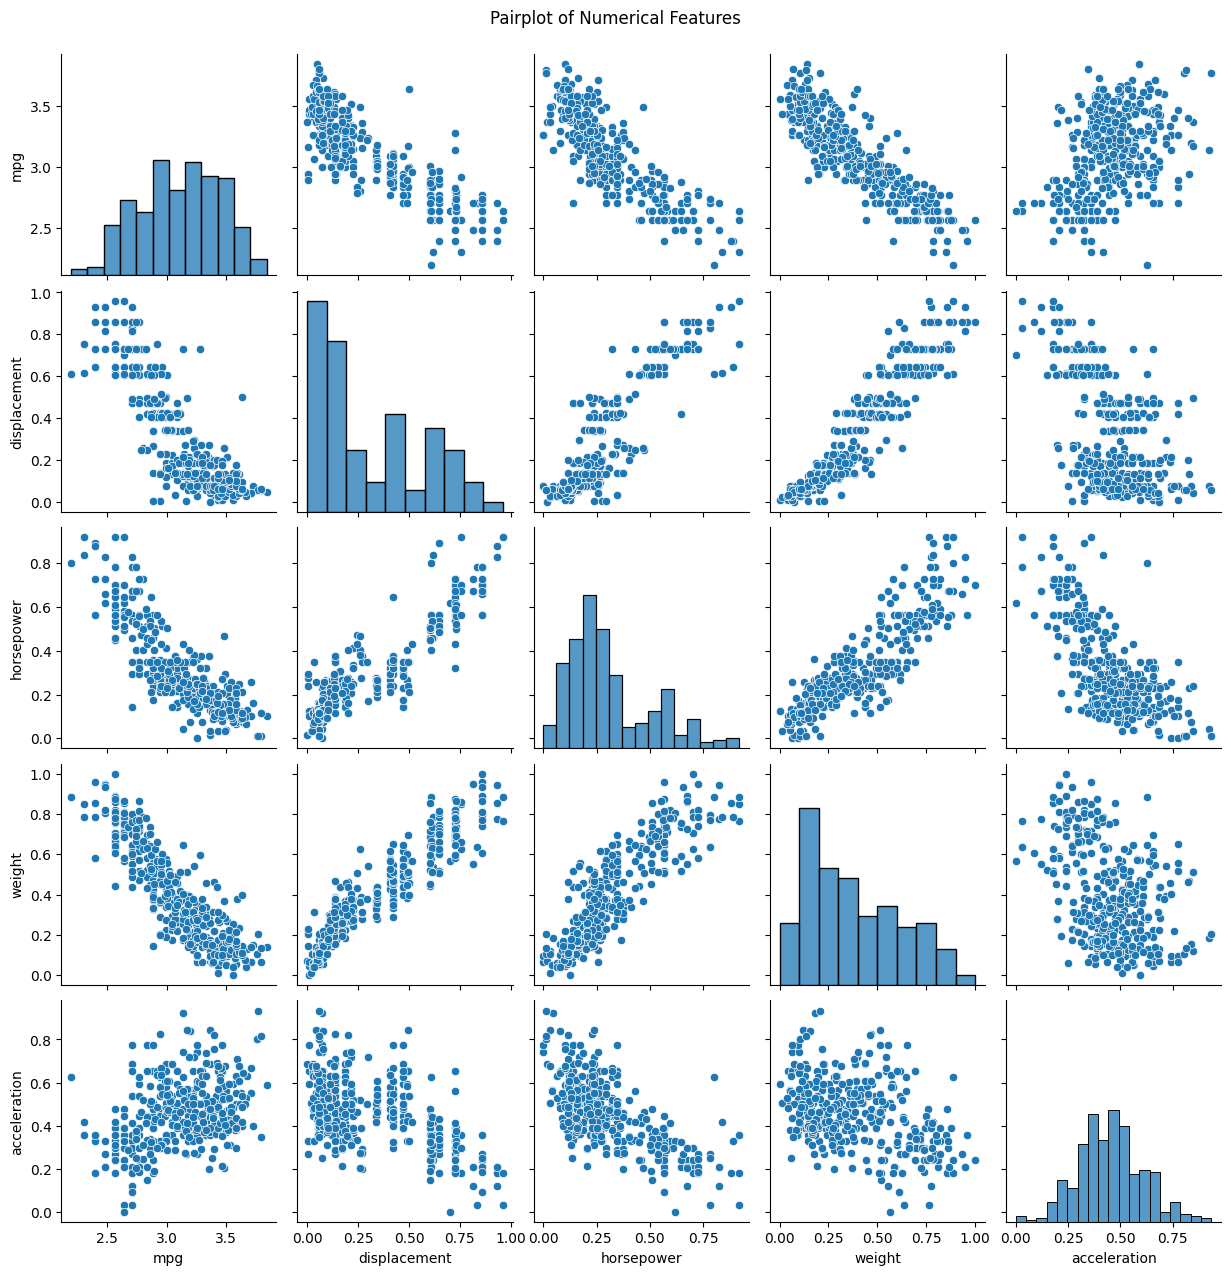

In [10]:
#pairplot of numerical features
plt.figure(figsize=(8, 4))
sns.pairplot(df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

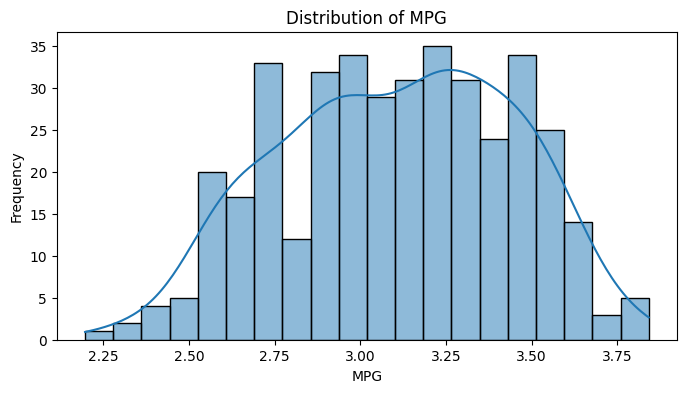

In [11]:
#histogram of target variable. The frequency of MPG values is shown in the histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['mpg'], bins=20, kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

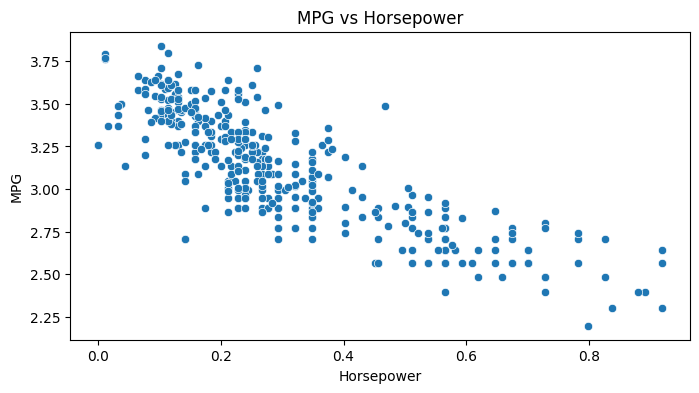

In [12]:
#scatter plot of MPG vs Horsepower. The relationship between MPG and Horsepower is shown in the scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

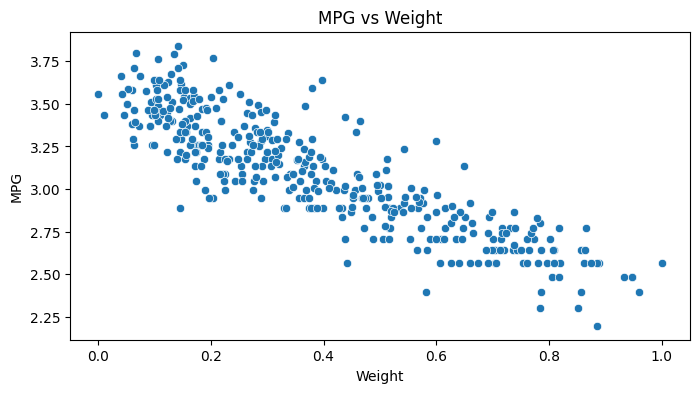

In [13]:

#scatter plot of MPG vs Weight. The relationship between MPG and Weight is shown in the scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

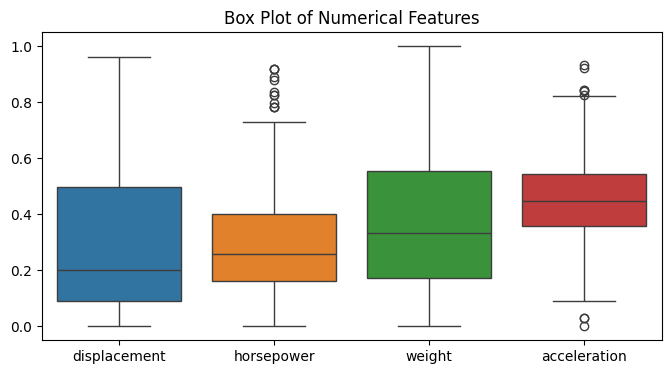

In [14]:
#box plot of numerical features. The distribution of numerical features is shown in the box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[numeric_cols])
plt.title('Box Plot of Numerical Features')
plt.show()

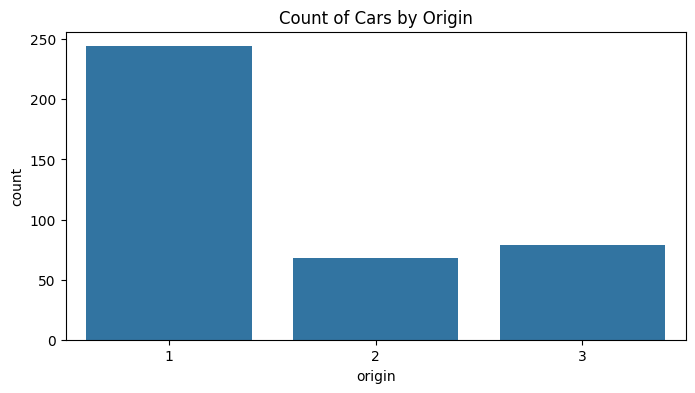

In [15]:
#count plot of origin. The count of cars by origin is shown in the count plot
plt.figure(figsize=(8, 4))
sns.countplot(x='origin', data=df)
plt.title('Count of Cars by Origin')
plt.show()

In [16]:
# Splitting the dataset into Train and Test Sets
X = df.drop(columns=['mpg'])
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Model Architecture
# Creating a Sequential Neural Network with 3 hidden layers
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


In [18]:
# Model Compilation
# Using Adam optimizer and Mean Squared Error (MSE) loss with MAPE metric
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

In [19]:
# Early Stopping Callback
# Stop training if validation loss does not improve for 10 consecutive epochs
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)

In [20]:
# Model Training
# Training the model with 100 epochs and batch size of 32
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping], shuffle=True)


Epoch 1/100
7/7 [==============================] - 1s 33ms/step - loss: 28.2593 - mae: 4.2763 - mape: 137.6498 - val_loss: 1.9921 - val_mae: 1.1294 - val_mape: 36.0474
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 6.1286 - mae: 2.1467 - mape: 70.0298 - val_loss: 3.3181 - val_mae: 1.5401 - val_mape: 49.9680
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 2.7955 - mae: 1.4573 - mape: 47.1981 - val_loss: 2.9327 - val_mae: 1.6020 - val_mape: 50.7203
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 1.0567 - mae: 0.8522 - mape: 27.4505 - val_loss: 1.1436 - val_mae: 0.9377 - val_mape: 30.7061
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6177 - mae: 0.6566 - mape: 21.8839 - val_loss: 0.5382 - val_mae: 0.6226 - val_mape: 19.4858
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.3853 - mae: 0.5044 - mape: 16.0272 - val_loss: 0.1219 - val_mae: 0.2712 - val_mape: 8.9667
Epoch 7

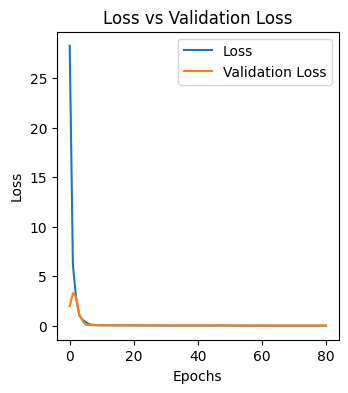

In [21]:
# Plot Loss and MAPE
# Visualizing the Loss and MAPE metrics across epochs
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

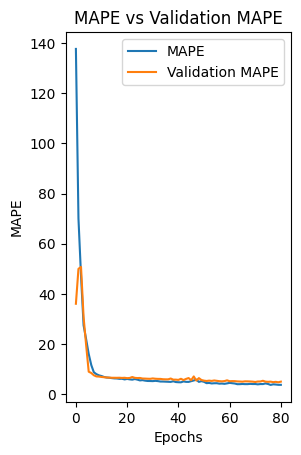

In [22]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mape'], label='MAPE')
plt.plot(history.history['val_mape'], label='Validation MAPE')
plt.title('MAPE vs Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

NameError: name 'pd' is not defined